In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("weather.csv",index_col=0,header=0)

cols = ['prcp','stp','smax','smin','gbrd','temp','dewp','tmax',
        'dmax','tmin','dmin','hmdy','hmax','hmin','wdsp','wdct','gust']

categorial = ['wsid','wsnm','elvt','lat','lon','inme','city','prov','yr','mo','da','hr']
categorial2 = ['yr','mo','da','hr']

df[categorial] = df[categorial].astype('category')

#Columns
#wsid - Weather station id
#wsnm - Name station (usually city location or nickname)
#elvt - Elevation
#lat - Latitude
#lon - Longitude
#inme - Station number (INMET number) for the location
#city - City
#prov - State (Province)
#mdct - Observation Datetime (complete date: date + time)
#date - Date of observation
#yr - The year (2000-2016)
#mo - The month (0-12)
#da - The day (0-31)
#hr - The hour (0-23)
#prcp - Amount of precipitation in millimetres (last hour)
#stp - Air pressure for the hour in hPa to tenths (instant)
#smax - Maximum air pressure for the last hour in hPa to tenths
#smin - Minimum air pressure for the last hour in hPa to tenths
#gbrd - Solar radiation KJ/m2
#temp - Air temperature (instant) in celsius degrees
#dewp - Dew point temperature (instant) in celsius degrees
#tmax - Maximum temperature for the last hour in celsius degrees
#dmax - Maximum dew point temperature for the last hour in celsius degrees
#tmin - Minimum temperature for the last hour in celsius degrees
#dmin - Minimum dew point temperature for the last hour in celsius degrees
#hmdy - Relative humid in % (instant)
#hmax - Maximum relative humid temperature for the last hour in %
#hmin - Minimum relative humid temperature for the last hour in %
#wdsp - Wind speed in metres per second
#wdct - Wind direction in radius degrees (0-360)
#gust - Wind gust in metres per second

In [3]:
def del_notunique_cols(df):
    for col in categorial:
        if(len(df[col].unique())==1):
            df = df.drop(labels = [col],axis=1)
    return df

def dropna_rows(df,cols):
    for i in range(len(df.index)):
        if (all(np.isnan(df.loc[i][cols]))):
            df = df.drop(i,axis=0)   
    return df

def dropna_cols(df):
    for col in list(df):
        if (any(np.isnan(df[col]))):
            df = df.drop(labels = [col],axis=1)
    return df
   
def del_empty_rows(df,cols):
    df[cols] = df[cols].replace(0,np.nan)
    df = df.dropna(how="all",subset=cols)
    return df

def zeros_fillna(df,cols):
    df[cols] = df[cols].fillna(0)
    return df

def standartize_minmax(df):
    df_min = df.min()
    df_max = df.max()
    df[headers[-17:]] = (df[headers[-17:]]-df_min[headers[-17:]])/(df_max[headers[-17:]]-df_min[headers[-17:]])
    return (df,df_min,df_max)

def unstandartize_minmax(df,df_min,df_max):
    df[headers[-17:]] = df[headers[-17:]]*(df_max[headers[-17:]]-df_min[headers[-17:]])+df_min[headers[-17:]]
    return df

def standartize_mean_std(df):
    df_mean = df.mean()
    df_std = df.std()
    df[headers[-17:]] = (df[headers[-17:]]-df_mean[headers[-17:]])/df_std[headers[-17:]]
    return (df,df_mean,df_std)

def unstandartize_mean_std(df,df_mean,df_std):
    df[headers[-17:]] = df[headers[-17:]]*df_std[headers[-17:]]+df_mean[headers[-17:]]
    return df

def LR_fillna(df):
    headers = list(df)[-17:]
    
    lr = LinearRegression()
    
    for target in headers[-17:]:
        features = [item for item in headers if item != target]
        X = dropna_cols(df[features])
        X_train = X.loc[df[target].notna()]
        notna_features = list(X_train)
        y_train = df[target].loc[df[target].notna()]
        X_test = X[notna_features].loc[df[target].isna()]
        y_test = df[target].loc[df[target].isna()]
        if(len(y_test)!=0):
            lr = lr.fit(X_train, y_train)

            y_predicted = np.array(lr.predict(X_test))
            df[target].loc[df[target].isna()] = y_predicted
        else:
            continue
    return df


def checkPrediction(df, target = 'temp', regressor = LinearRegression()):
    features = [item for item in headers if item != target]
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target].astype('float64'), test_size=0.2)
    regressor = regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(mean_squared_error(y_test, y_pred))

In [4]:
df = df.drop(labels=["mdct","date"], axis=1)
df = del_notunique_cols(df)

df = del_empty_rows(df,cols)
df = zeros_fillna(df,['prcp','gbrd'])

headers = list(df)

In [5]:
df_mm,df_min,df_max = standartize_minmax(df)

df_mm_lr = LR_fillna(df_mm) 
df_mm_lr = unstandartize_minmax(df_mm_lr,df_min,df_max)

checkPrediction(df_mm_lr)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Prog

0.05772306543986582


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
import seaborn as sb
# plot heatmap on how data columns are correlated
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)

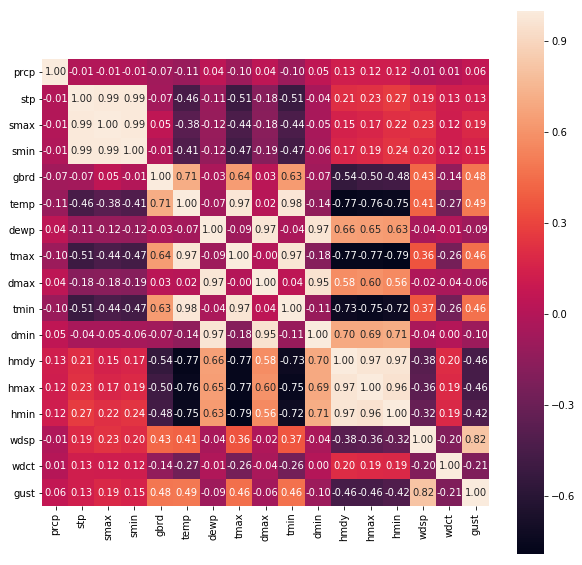

In [7]:
plot_correlation(df_mm_lr[headers[-17:]], headers[-17:])

prcp


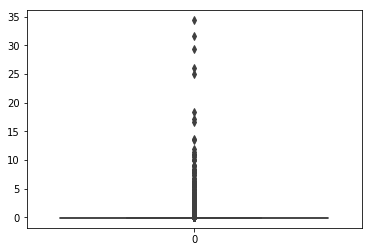

In [8]:
df_mstd,df_mean,df_std = standartize_mean_std(df_mm_lr)
#Precipation (prcp) boxplot
sb.boxplot(data=df_mstd[headers[4]])
print(headers[4])

['stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax']


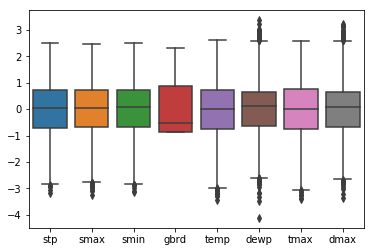

In [9]:
sb.boxplot(data=df_mstd[headers[5:13]])
print(headers[5:13])

['tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct', 'gust']


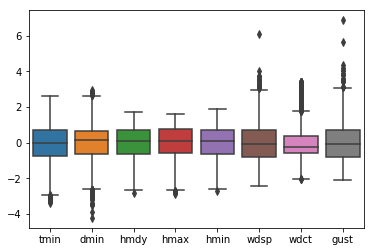

In [10]:
sb.boxplot(data=df_mstd[headers[13:21]])
print(headers[13:21])

In [11]:
def del_outliers(dataframe):
    dataset = sorted(dataframe)
    q1, q3= np.percentile(dataset,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    dataframe = dataframe.loc[dataframe > lower_bound]
    dataframe = dataframe.loc[dataframe < upper_bound]
    return dataframe

In [12]:
#deleting rows with outliers
for i in range(5,21):
    df_mstd[headers[i]] = del_outliers(df_mstd[headers[i]])


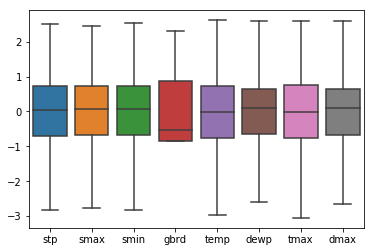

In [13]:
sb.boxplot(data=df_mstd[headers[5:13]])

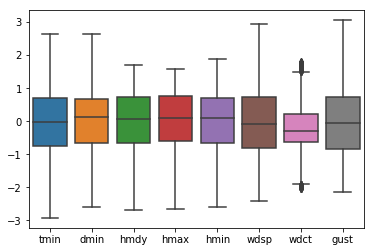

In [14]:
sb.boxplot(data=df_mstd[headers[13:21]])

In [15]:
df_mstd = df_mstd.dropna(axis=0)
df_mstd = unstandartize_mean_std(df_mstd,df_mean,df_std)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
df_mstd.describe()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000
mean,0.121841,985.187687,985.487633,984.935780,1103.643859,27.164738,20.022201,27.851476,20.763675,26.435088,19.336009,67.724258,71.522341,64.264998,1.967742,122.043816,5.084075
std,1.453059,2.482694,2.448079,2.481595,1271.358705,3.562330,3.088701,3.628686,2.999341,3.444621,3.140547,17.601652,16.926450,17.876441,1.094286,44.980921,2.356447
min,0.000000,978.200000,978.500000,977.900000,0.000000,15.900000,11.800000,16.100000,12.800000,15.700000,10.900000,23.000000,26.000000,22.000000,-0.236958,2.000000,0.100000
25%,0.000000,983.500000,983.800000,983.200000,0.000000,24.400000,17.900000,25.100000,18.700000,23.800000,17.300000,57.000000,61.000000,53.000000,1.100000,95.000000,3.200000
50%,0.000000,985.300000,985.600000,985.100000,483.712000,27.100000,20.300000,27.800000,21.000000,26.300000,19.700000,69.000000,73.000000,66.000000,1.900000,117.000000,5.100000
75%,0.000000,987.000000,987.200000,986.700000,2242.002500,29.800000,22.100000,30.500000,22.800000,28.900000,21.570519,80.000000,84.000000,76.000000,2.800000,150.000000,6.800000
max,53.000000,991.400000,991.500000,991.200000,3993.196000,36.800000,28.300000,37.600000,28.900000,35.900000,27.500000,100.000000,100.000000,100.000000,5.200000,253.000000,12.400000


In [17]:
#dataframes with grouped by month mean pressure values
mo_stp = df_mstd.groupby(['mo'])['stp'].mean()
mo_smax = df_mstd.groupby(['mo'])['smax'].mean()
mo_smin = df_mstd.groupby(['mo'])['smin'].mean()

#dataframes with grouped by month mean temp values
mo_temp = df_mstd.groupby(['mo'])['temp'].mean()
mo_tmax = df_mstd.groupby(['mo'])['tmax'].mean()
mo_tmin = df_mstd.groupby(['mo'])['tmin'].mean()

#dataframes with grouped by hour mean temp values
hr_temp = df_mstd.groupby(['hr'])['temp'].mean()
hr_tmax = df_mstd.groupby(['hr'])['tmax'].mean()
hr_tmin = df_mstd.groupby(['hr'])['tmin'].mean()

#dataframes with grouped by month and hour sum precipation values
mo_prcp = df_mstd.groupby(['mo'])['prcp'].sum()
hr_prcp = df_mstd.groupby(['hr'])['prcp'].sum()

#dataframes with grouped by month and hour sum solar radiation values
hr_gbrd = df_mstd.groupby(['hr'])['gbrd'].mean()
mo_gbrd = df_mstd.groupby(['mo'])['gbrd'].mean()

In [18]:
pressure_data = pd.DataFrame({'smin': mo_smin, 'stp': mo_stp-mo_smin, 'smax': mo_smax-mo_stp})
temp_month_data = pd.DataFrame({'tmin': mo_tmin, 'temp': mo_temp-mo_tmin, 'tmax': mo_tmax-mo_temp})
temp_hour_data = pd.DataFrame({'tmin': hr_tmin, 'temp': hr_temp-hr_tmin, 'tmax': hr_tmax-hr_temp})

(983.1541825539648, 988.6055718475085)

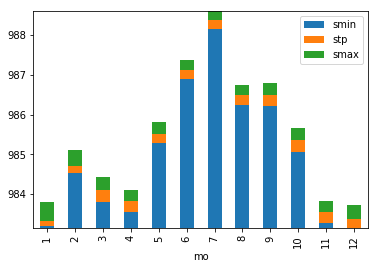

In [19]:
pressure_plot = pressure_data.plot.bar(stacked=True)
pressure_plot.set_ylim([min(mo_smin),max(mo_smax)])

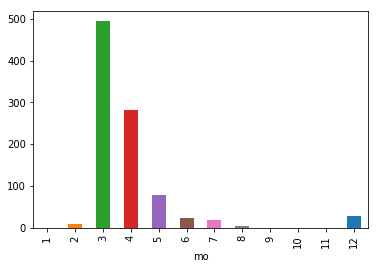

In [20]:
prcp_plot = mo_prcp.plot.bar()

(24.262614978462555, 31.18740803134307)

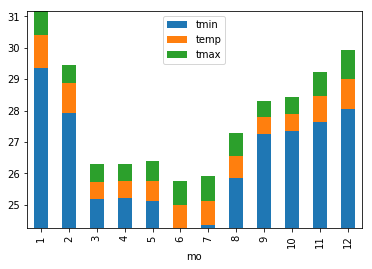

In [21]:
temp_month_plot = temp_month_data.plot.bar(stacked=True)
temp_month_plot.set_ylim([min(mo_tmin),max(mo_tmax)])

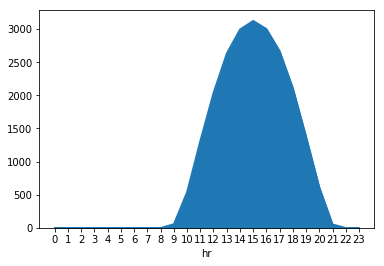

In [22]:
gbrd_hr_plot = hr_gbrd.plot.area(xticks = range(0,24))

(22.136187138182645, 32.29615384615386)

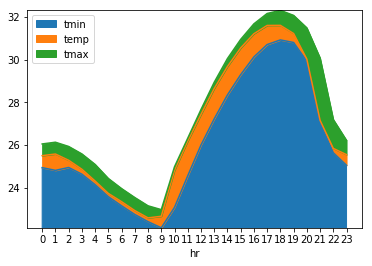

In [23]:
temp_hour_plot = temp_hour_data.plot.area(stacked=True,xticks = range(0,24))
temp_hour_plot.set_ylim([min(hr_tmin),max(hr_tmax)])

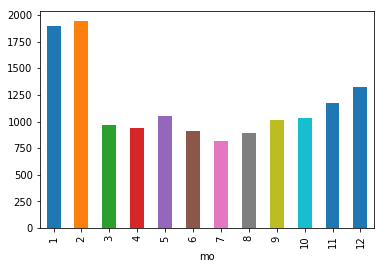

In [24]:
gbrd_mo_plot = mo_gbrd.plot.bar()

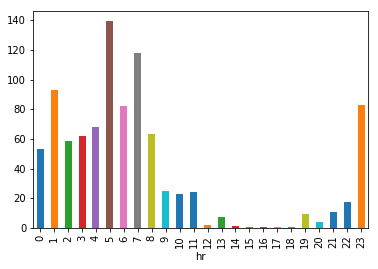

In [25]:
prcp_hr_plot = hr_prcp.plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


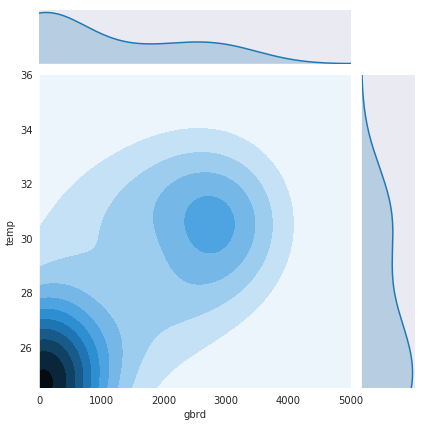

In [26]:
hour_data = pd.DataFrame({'temp': hr_temp, 'gbrd': hr_gbrd})

with sb.axes_style('dark'):
    temp_jointplot = sb.jointplot( 'gbrd', 'temp', hour_data, kind='kde', xlim = (0,5000), ylim = (24.5,36));

In [27]:
#predict the temp col with LR and get MSE score
checkPrediction(df_mstd)

0.05492584086731048


In [28]:
#predict the temp col with Lasso regression and get MSE score
checkPrediction(df_mstd, 'temp', Lasso(alpha=0.001))

0.05784952309351846


In [29]:
#predict the temp col with Ridge regression and get MSE score
checkPrediction(df_mstd, 'temp', Ridge(alpha=0.001))

0.06015358109253873


In [30]:
#predict the temp col with ElasticNet regression and get MSE score
checkPrediction(df_mstd, 'temp', ElasticNet(alpha=0.001, l1_ratio=0.25))

0.05440195089956306


In [31]:
from sklearn.model_selection import cross_val_score
def crossValPrediction(df, target = 'temp', regressor = LinearRegression()):
    features = [item for item in headers if item != target]
    results = -cross_val_score(regressor, df[features], df[target].astype('float64'), cv=10, scoring = 'neg_mean_squared_error')
    return results

In [32]:
#predict the temp col with LR and get mean MSE cross-val score
LR_score = np.mean(crossValPrediction(df_mstd))
print(LR_score)

0.06383614962024699


In [33]:
#predict the temp col with Lasso regression and get mean MSE cross-val score
Lasso_score = np.mean(crossValPrediction(df_mstd, 'temp', Lasso(alpha=0.001)))
print(Lasso_score)

0.06402550705215745


In [34]:
#predict the temp col with Ridge regression and get mean MSE cross-val score
Ridge_score = np.mean(crossValPrediction(df_mstd, 'temp', Ridge(alpha=0.001)))
print(Ridge_score)

0.06383614507826556


In [35]:
#predict the temp col with ElasticNet regression and get mean MSE cross-val score
ElasticNet_score = np.mean(crossValPrediction(df_mstd, 'temp', ElasticNet(alpha=0.001, l1_ratio=0.25)))
print(ElasticNet_score)

0.06385239568456698


In [36]:
#all models give about the same result ~= 0.063